# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### Random Forest

In [3]:
rf = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [4]:
param_distributions_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [5, 10, 20, 50, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

In [6]:
df_rf, model_rf, params_rf = runner.search_params(
    model=rf,
    params=param_distributions_rf,
    X_train=X_train,
    Y_train=Y_train,
    max_combinations=100
)

Num combinações de hiperparâmetros: 100
Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': False}
Tempo de busca: 27.03s


Cross-Validation (5-folds): 100%|██████████| 5/5 [00:12<00:00,  2.49s/it]


In [7]:
df_rf

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
0,1,0.892744,0.999923,0.897567,0.999936,0.875699,0.999923,0.863358,0.999847,"[0.0, 0.07787065552133744, 1.0]","[0.0, 0.8633578431372549, 1.0]"
4,5,0.887963,0.999923,0.892930,0.999936,0.870025,0.999923,0.857756,0.999847,"[0.0, 0.0818301803783546, 1.0]","[0.0, 0.8577559779276518, 1.0]"
1,2,0.887091,0.999945,0.890881,0.999936,0.868762,0.999923,0.863971,1.000000,"[0.0, 0.0897887323943662, 1.0]","[0.0, 0.8639705882352942, 1.0]"
2,3,0.886610,0.999923,0.892162,0.999936,0.868561,0.999923,0.852851,0.999847,"[0.0, 0.0796304443466784, 1.0]","[0.0, 0.8528510116492949, 1.0]"
3,4,0.881305,0.999923,0.887295,0.999936,0.862328,0.999923,0.844880,0.999847,"[0.0, 0.08227012758468984, 1.0]","[0.0, 0.8448804414469651, 1.0]"


In [ ]:
runner.save_model(model_rf, "random_forest")
runner.save_results(df_rf, "random_forest")

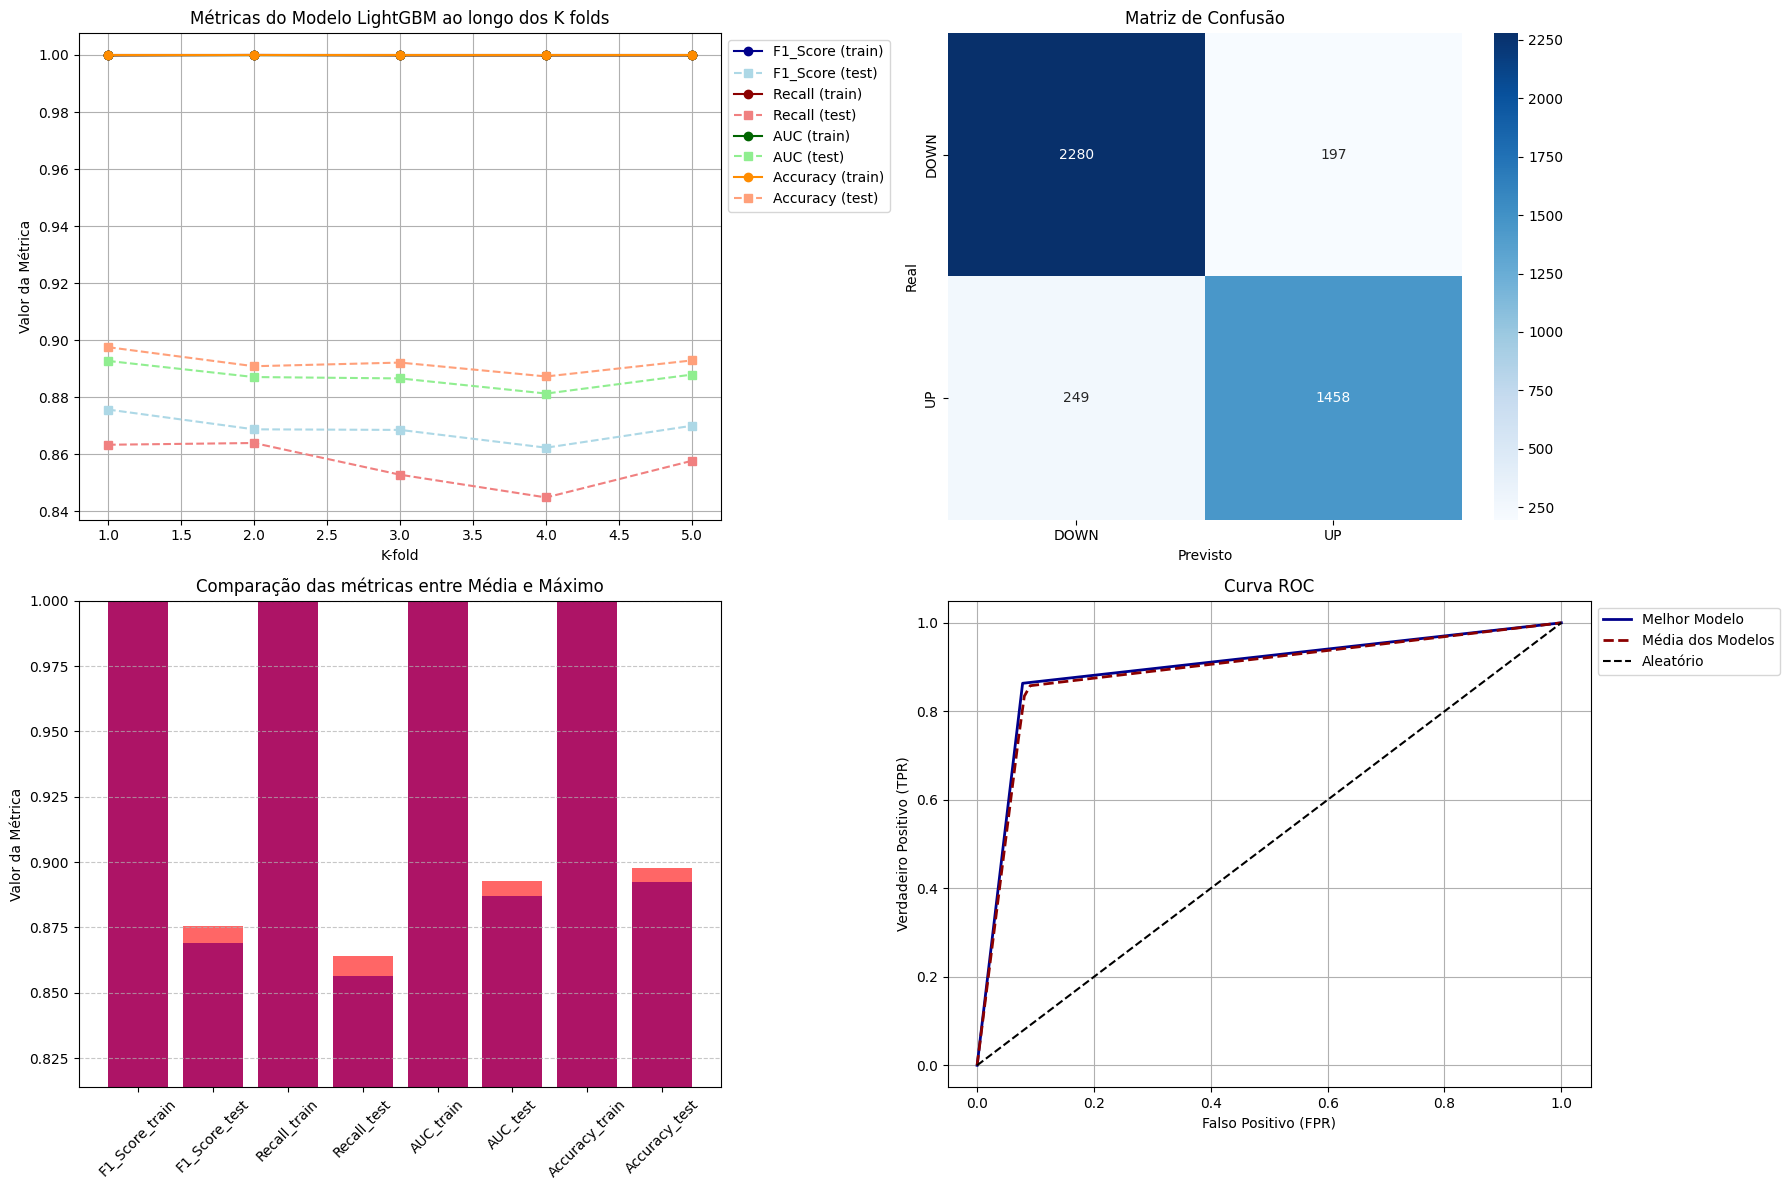

In [ ]:
plots.model_evaluate(model_rf, df_rf, X_test, Y_test, model_name="Random Forest")